In [2]:
import import_ipynb
from Model_Functions import *

# 8. Support Vector Machine for Personalized Cancer Diagnosis

The CalibratedClassifierCV we used here, grabs (yi)s and converts them to their probabilities. We need to do so because here we are using logloss and logloss requires probability values to operate.
<br>
Here we are implementing Logistic Regression using SGDClassifier. As long as we are using we are using hinge-loss as loss function, SGDClassifier is nothing but Support Vector Machine. We are balancing the data using oversampling so that smaller classes also work well, otherwise smaller classes (like class 8 in this case) would vanish and disappear in heatmap.

### 8.1 Training Support Vector Machine model

In [3]:
from sklearn.linear_model import SGDClassifier

In [4]:
alpha = [10**x for x in range (-7, 5)]
logloss_cv = []
for i in alpha:
    print('For alpha =', i)
    algo = SGDClassifier(alpha=i, penalty='l2', class_weight='balanced', loss='hinge', random_state=42)
    algo.fit(train_x_onehotCoding, y_train)
    sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
    sigmoid_clf.fit(train_x_onehotCoding, y_train)
    # To avoid rounding error while multiplying probabilites we use log-probability estimates
    sigmoid_clf_probs = sigmoid_clf.predict_proba(cv_x_onehotCoding)
    logloss_cv.append(log_loss(cv_y, sigmoid_clf_probs, labels=algo.classes_, eps=1e-15))
    
    print("Log Loss :",log_loss(cv_y, sigmoid_clf_probs))

For alpha = 1e-07
Log Loss : 1.3916504339757994
For alpha = 1e-06
Log Loss : 1.3708716560606953
For alpha = 1e-05
Log Loss : 1.3666184188662465
For alpha = 0.0001
Log Loss : 1.3045929349114942
For alpha = 0.001
Log Loss : 1.1811603853439807
For alpha = 0.01
Log Loss : 1.1528315972749636
For alpha = 0.1
Log Loss : 1.3478312333118747
For alpha = 1
Log Loss : 1.7437984506145674
For alpha = 10
Log Loss : 1.7613491401420502
For alpha = 100
Log Loss : 1.7613491742583371
For alpha = 1000
Log Loss : 1.7613492214078752
For alpha = 10000
Log Loss : 1.7613492366411896


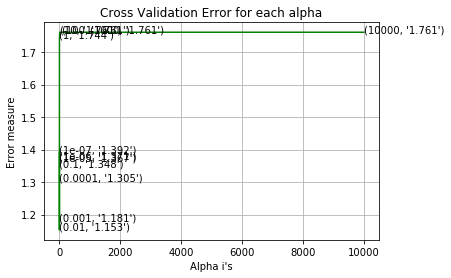

In [5]:
fig, ax = plt.subplots()
ax.plot(alpha, logloss_cv, c='g')
for i, txt in enumerate(np.round(logloss_cv, 3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i], logloss_cv[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [6]:
best_alpha = np.argmin(logloss_cv)
algo = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', class_weight='balanced', loss='hinge', random_state=42)
algo.fit(train_x_onehotCoding, y_train)
sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
sigmoid_clf.fit(train_x_onehotCoding, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01,
                                                    class_weight='balanced',
                                                    random_state=42))

In [7]:
predict_y = sigmoid_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=algo.classes_, eps=1e-15))

For values of best alpha =  0.01 The train log loss is: 0.734087745544846
For values of best alpha =  0.01 The cross validation log loss is: 1.1528315972749636
For values of best alpha =  0.01 The test log loss is: 1.179549749598063


### 8.2 Testing Support Vector Machine model

Log loss : 1.1528315972749636
Mis-classified points : 32.70676691729324 %


------------------------------ Confusion matrix ------------------------------



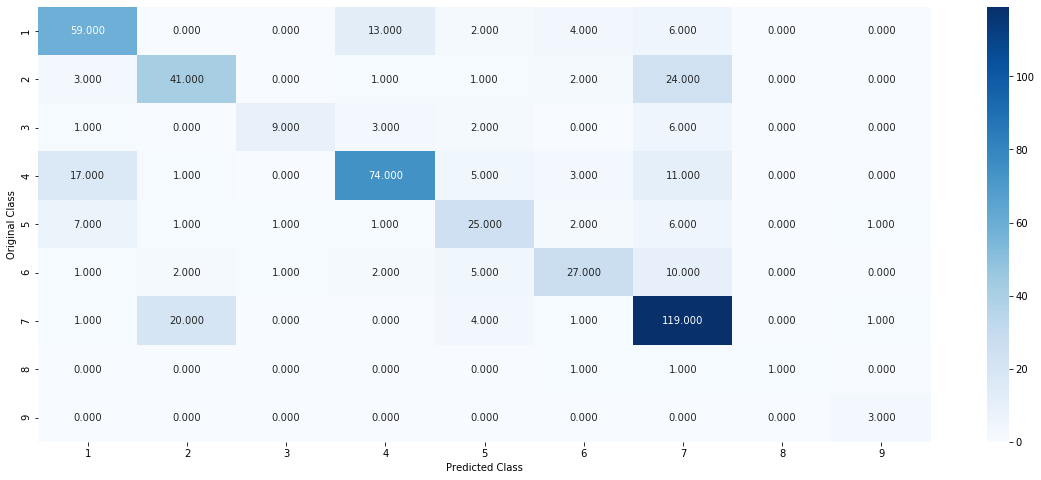



------------------------------ Precision matrix (Columm Sum=1) ------------------------------



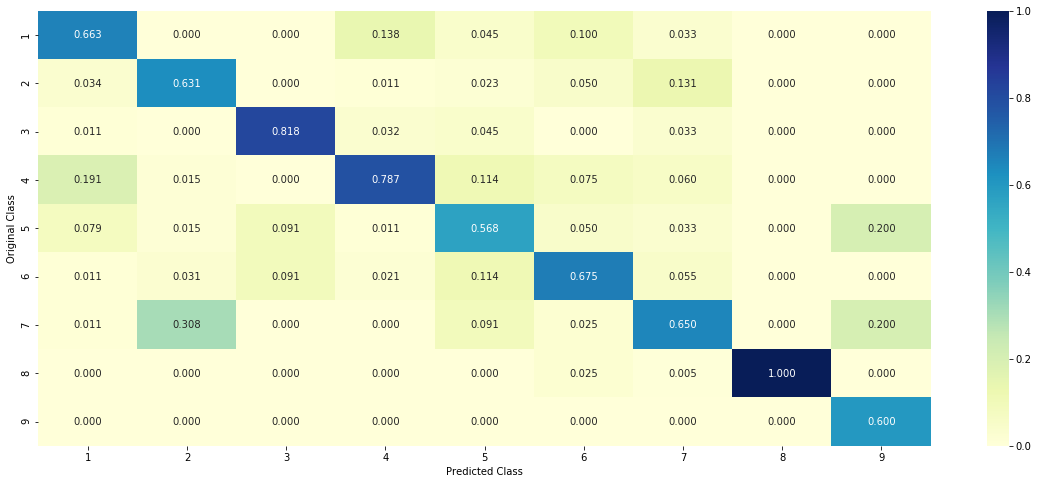



------------------------------ Recall matrix (Row sum=1) ------------------------------



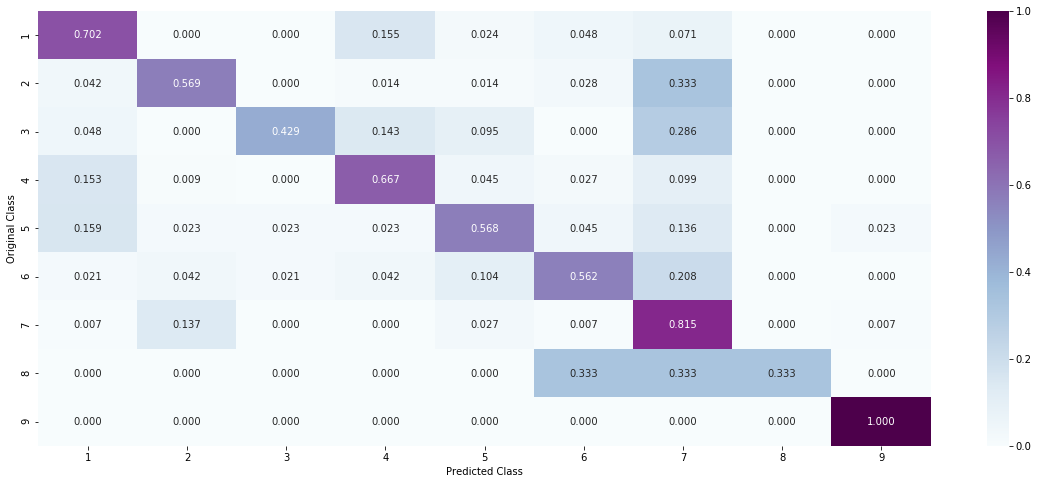

In [8]:
algo = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', class_weight='balanced', loss='hinge', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, y_train, cv_x_onehotCoding, y_cv, algo)

### 8.3 Feature Importance: Correctly Classified Points

In [9]:
algo = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', class_weight='balanced', loss='hinge', random_state=42)
algo.fit(train_x_onehotCoding, y_train)
test_point_index = 1
no_feature = 100
predicted_cls = sigmoid_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices=np.argsort(-1*abs(algo.coef_))[predicted_cls-1][:,:no_feature]
print("=="*30)
get_impfeature_names(indices[0], x_test['Text'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0432 0.7902 0.0058 0.0536 0.03   0.0185 0.0513 0.0037 0.0036]]
Actual Class : 2
Out of the top  100  features  0 are present in query point


### 8.4 Feature Importance: Incorrectly Classified Points

In [10]:
test_point_index = 100
no_feature = 100
predicted_cls = sigmoid_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-1*abs(algo.coef_))[predicted_cls-1][:,:no_feature]
print("=="*30)
get_impfeature_names(indices[0], x_test['Text'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1057 0.0555 0.0145 0.1289 0.0665 0.0553 0.5591 0.0065 0.0079]]
Actual Class : 7
Out of the top  100  features  0 are present in query point
